# Diffusion Curvature on the iPSC Dataset

In [2]:
import diffusion_curvature
import numpy as np

In [3]:
X = np.loadtxt('datasets/ipsc.txt')

In [4]:
X.shape

(220450, 33)

This is quite a few more points than DC has ever processed before. The most expensive part of the computations should be the powering of the diffusion matrix, but it may also be that numpy has other functions (like comparing values across as 220450 x 220450 matrix) that I need to find parallelized replacements for.

First, let's see if calculating this diffusion matrix is feasible with our method.

In [5]:
# from diffusion_curvature.core import DiffusionMatrix
# P = DiffusionMatrix(X, kernel_type = "adaptive anisotropic")

Uh oh. The kernel crashed. That's not a good sign.

Perhaps PHATE can save the day.

In [6]:
import phate
phate_op = phate.PHATE(knn=5, decay=20, t=20)
transformed = phate_op.fit_transform(X)


Calculating PHATE...
  Running PHATE on 220450 observations and 33 variables.
  Calculating graph and diffusion operator...
    Calculating KNN search...
    Calculated KNN search in 3349.20 seconds.
    Calculating affinities...
    Calculated affinities in 1792.45 seconds.
  Calculated graph and diffusion operator in 5141.98 seconds.
  Calculating landmark operator...
    Calculating SVD...
    Calculated SVD in 36.82 seconds.
    Calculating KMeans...
    Calculated KMeans in 15.02 seconds.
  Calculated landmark operator in 55.93 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 0.97 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 2.65 seconds.
Calculated PHATE in 5201.55 seconds.


/var/folders/y5/4qfj8yjj1hb97n6q01_dg0km0000gn/T/ipykernel_31096/3253906491.py:1: DeprecationWarning: Call to deprecated function (or staticmethod) scatter2d. (Use scprep.plot.scatter2d instead) -- Deprecated since version 1.0.0.
  phate.plot.scatter2d(transformed)
/Users/adjourner/miniforge3/envs/graphcurvature/lib/python3.10/site-packages/scprep/plot/utils.py:104: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


<AxesSubplot:>

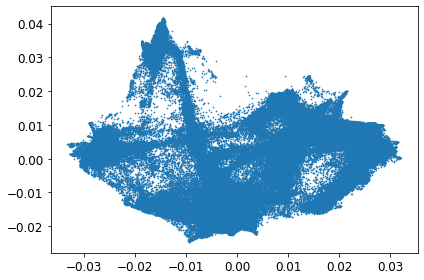

In [7]:
phate.plot.scatter2d(transformed)

In [9]:
P_phate = phate_op.diff_op

In [11]:
P_phate.shape

(2000, 2000)

As a workaround, we can use tensorflow to do the matrix powering.

In [17]:
from scipy.sparse import bsr_array

ImportError: cannot import name 'bsr_array' from 'scipy.sparse' (/Users/adjourner/miniforge3/envs/graphcurvature/lib/python3.10/site-packages/scipy/sparse/__init__.py)

In [15]:
X_sparse = bsr_array(X)

NameError: name 'bsr_array' is not defined

In [18]:
np.savetxt('datasets/ipsc_diff_matrix.gz',P_phate)